Juntao Dong

# Implement logistic regression on iris dataset
## Detect the Iris-Virginica type based only on one feature

In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [2]:
themax = np.amax(iris["data"], axis=0)
print('Max value: ', themax)
themin = np.amin(iris["data"], axis=0)
print('Min value: ', themin)

Max value:  [ 7.9  4.4  6.9  2.5]
Min value:  [ 4.3  2.   1.   0.1]


In [3]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
 log_reg.predict([[1.7], [1.5]])

array([1, 0])

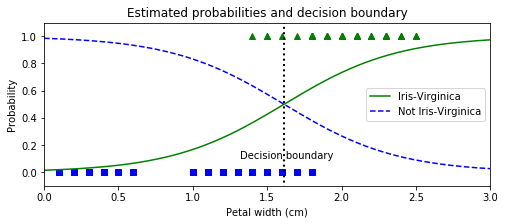

In [5]:
import matplotlib
import matplotlib.pyplot as plt
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend()
plt.text(1.32,0.1,'Decision boundary')
plt.title('Estimated probabilities and decision boundary')
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')
plt.axis([0, 3, -0.1, 1.1])
plt.show()

## Detect the Iris-Virginica type based on two features

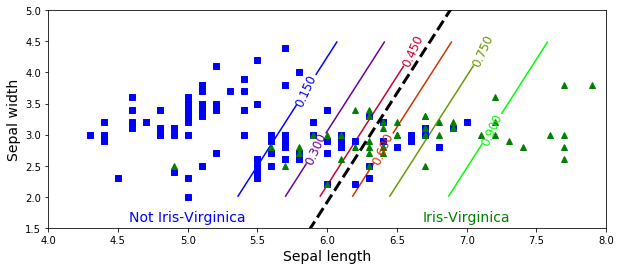

In [6]:
X2 = iris["data"][:, (0, 1)]  # sepal length, sepal width
y2 = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X2, y2)

x0, x1 = np.meshgrid(
        np.linspace(4, 8, 500).reshape(-1, 1),
        np.linspace(2, 4.5, 200).reshape(-1, 1),
    )
X_new2 = np.c_[x0.ravel(), x1.ravel()]

y_proba2 = log_reg.predict_proba(X_new2)

plt.figure(figsize=(10, 4))
plt.plot(X2[y2==0, 0], X2[y2==0, 1], "bs")
plt.plot(X2[y2==1, 0], X2[y2==1, 1], "g^")

zz = y_proba2[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(5, 1.6, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(7, 1.6, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Sepal length", fontsize=14)
plt.ylabel("Sepal width", fontsize=14)
plt.axis([4, 8, 1.5, 5])
plt.show()

## Detect the Iris-Virginica type based on all features

In [7]:
X_new4 = np.empty((1,4))
X4 = iris["data"]
y4 = (iris["target"] == 2).astype(np.int) #??
for i in range(4):
    X_new4[0,i] = np.random.uniform(themin[i], themax[i])
print (X_new4)
log_reg.fit(X4, y4)
if log_reg.predict(X_new4) is 1:
    print('The randomly generated iris is predicted to be Virginica')
else:
    print('The randomly generated iris is predicted not to be Virginica')

[[ 5.67242893  4.25551086  1.08164171  1.43032033]]
The randomly generated iris is predicted not to be Virginica


# Implement softmax regression on iris dataset

In [8]:
iris = datasets.load_iris()
X = iris["data"][:, (0, 1)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

softmax_reg.predict([[5,4],[7,3]])

array([0, 2])

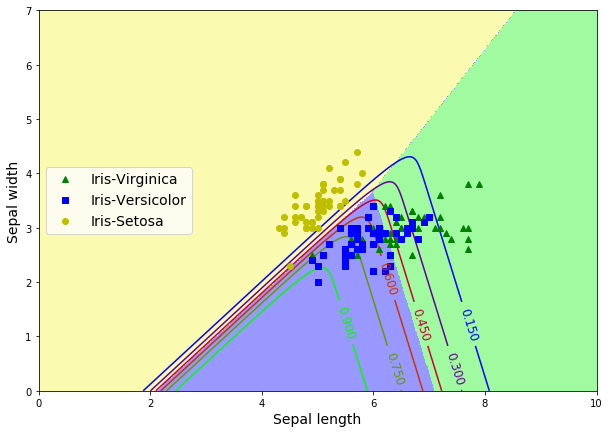

In [9]:
x0, x1 = np.meshgrid(
        np.linspace(0, 10, 500).reshape(-1, 1),
        np.linspace(0, 7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 7))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Sepal length", fontsize=14)
plt.ylabel("Sepal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 10, 0, 7])
plt.show()